
# austen-sense.txt 문서를 사용하여 다음 지시사항을 수행하라.

    - 1.토큰생성 : 정규표현식으로 단어 토큰을 생성한다.
    - 2.형태소 분석을 하여 명사만 추출한다
    - 3.추출된 명사리스트를 사용하여 출현빈도 구하라.
    - 4.명사출현빈도를 사용하여 wordcloud를 작성하라.
        - 워드클라우드 모양은 임의의 이미지를 사용하여 지정한다.

In [26]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag

sense_raw = nltk.corpus.gutenberg.raw('austen-sense.txt')

In [27]:
word_token = RegexpTokenizer("[\w]+")

In [28]:
tokenizsed_sense_raw = word_token.tokenize(sense_raw)

In [29]:
tagged_total_list = pos_tag(tokenizsed_sense_raw)

noun_list = [ttl[0] for ttl in tagged_total_list if ttl[1] == 'NN']

In [30]:
from nltk import Text
import matplotlib.pyplot as plt

text = Text(noun_list)
freqNoun = text.vocab()
freqNoun

FreqDist({'s': 347, 'sister': 257, 'mother': 256, 'time': 237, 'thing': 185, 'nothing': 170, 'house': 159, 'day': 150, 'heart': 127, 'man': 121, ...})

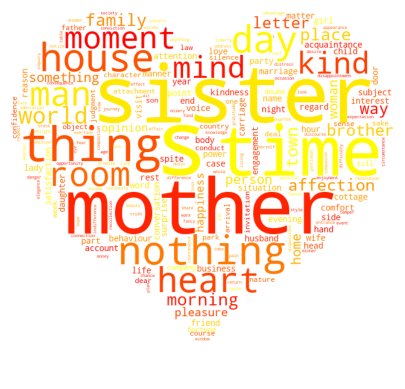

In [31]:
from wordcloud import WordCloud
from PIL import Image
import numpy as np

img = Image.open('data/heart.png')
img_arr = np.array(img)

wc = WordCloud(width=1000, height=800, background_color='white', random_state=0, mask=img_arr, colormap='autumn')
plt.imshow(wc.generate_from_frequencies(freqNoun))
plt.axis("off")
plt.show()